In [65]:
import numpy as np
import matplotlib.pyplot as plt
import CIT_Tools as CITT

In [66]:
omega_RF = 2* np.pi*300*1e3
z0 = 9*1e-3
r0 = 1e-2
xi = 2.36*1e-2

CylinderTrap = CITT.CIT(omega_RF,xi,z0,r0)


rs = np.linspace(0.05*r0,0.95*r0,500)
zs = np.linspace(-0.95*z0,0.95*z0,1000)

In [67]:
VZs = []
VRs = []
tol = 1e-8
for r in rs:
    VRs.append(CylinderTrap.CITPotential(r,0,1,tol = tol))
VRs = np.array(VRs)

for z in zs:
    VZs.append(CylinderTrap.CITPotential(0,z,1,tol = tol))
VZs = np.array(VZs)

Text(0.5, 0, 'r / mm')

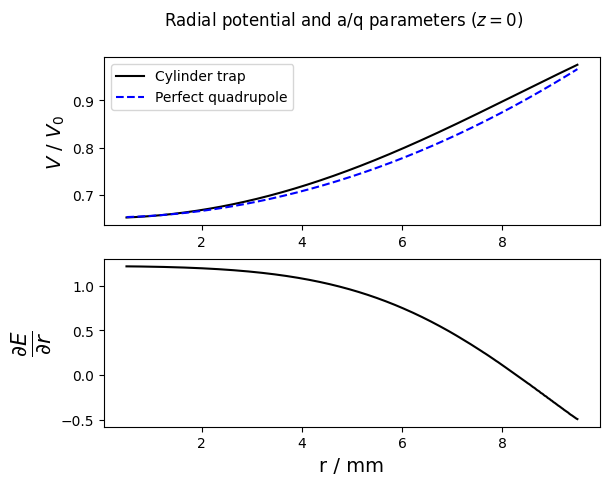

In [91]:
fsize = 14
figr,axr = plt.subplots(2,1)
spacing = (rs[1]-rs[0])*1e3

axr[0].plot(rs*1e3,VRs, 'k', label = 'Cylinder trap')
axr[0].plot(rs*1e3,VRs[0] + (1-VRs[0])*(rs/CylinderTrap.r0)**2, 'b--', label = 'Perfect quadrupole')

axr[1].plot(rs*1e3,np.gradient(np.gradient(VRs,spacing),spacing)/np.gradient(np.gradient(VRs[0] + (1-VRs[0])*(rs/CylinderTrap.r0)**2,spacing),spacing),'k')
# axr[1].plot(rs*1e3,np.gradient(VRs[0] + (1-VRs[0])*(rs/CylinderTrap.r0)**2)/rs, 'b--', label = 'Perfect quadrupole')

axr[0].legend()
figr.suptitle('Radial potential and a/q parameters ($z = 0$)',)

axr[0].set_ylabel(r'$V$ / $V_0$',fontsize = fsize)
axr[1].set_ylabel(r'$\frac{\partial E}{\partial r}$',fontsize = 22)
axr[1].set_xlabel('r / mm',fontsize = fsize)

Text(0.5, 0, 'z / mm')

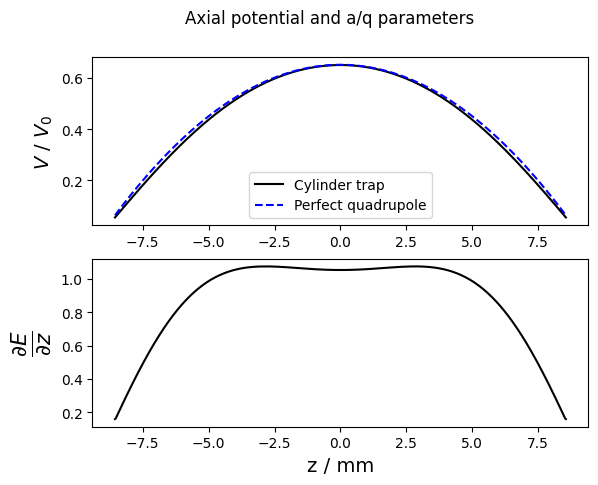

In [94]:
figz,axz = plt.subplots(2,1)


axz[0].plot(zs*1e3,VZs, 'k', label = 'Cylinder trap')
axz[0].plot(zs*1e3, VRs[0] -VRs[0]*(zs/CylinderTrap.z0)**2, 'b--', label = 'Perfect quadrupole')

axz[1].plot(zs*1e3,np.gradient((np.gradient(VZs,spacing)),spacing)/np.gradient(np.gradient(VRs[0] -VRs[0]*(zs/CylinderTrap.z0)**2,spacing),spacing),'k')
# axz[1].plot(rs*1e3,np.gradient(VRs[0] + (1-VRs[0])*(rs/CylinderTrap.r0)**2), 'b--', label = 'Perfect quadrupole')

axz[0].legend()
figz.suptitle('Axial potential and a/q parameters ')

axz[0].set_ylabel(r'$V$ / $V_0$',fontsize = fsize)
axz[1].set_ylabel(r'$\frac{\partial E}{\partial z}$',fontsize = 22)
axz[1].set_xlabel('z / mm',fontsize = fsize)

In [97]:
rs = np.linspace(0,0.95*r0,500)
zs = np.linspace(-0.95*z0,0.95*z0,1000)

Z, R  = np.meshgrid(zs,rs)
V = np.zeros((len(rs),len(zs)))
for j,z in enumerate(zs):
    for m,r in enumerate(rs):
        V[m,j] = CylinderTrap.CITPotential(r,z,1e-3)
    print(j/len(zs)*100, '% Done')


np.savetxt('PotentialStrengthTrap.txt',V)


0.0 % Done
0.1 % Done
0.2 % Done
0.3 % Done
0.4 % Done
0.5 % Done
0.6 % Done
0.7000000000000001 % Done
0.8 % Done
0.8999999999999999 % Done
1.0 % Done
1.0999999999999999 % Done
1.2 % Done
1.3 % Done
1.4000000000000001 % Done
1.5 % Done
1.6 % Done
1.7000000000000002 % Done
1.7999999999999998 % Done
1.9 % Done
2.0 % Done
2.1 % Done
2.1999999999999997 % Done
2.3 % Done
2.4 % Done
2.5 % Done
2.6 % Done
2.7 % Done
2.8000000000000003 % Done
2.9000000000000004 % Done
3.0 % Done
3.1 % Done
3.2 % Done
3.3000000000000003 % Done
3.4000000000000004 % Done
3.5000000000000004 % Done
3.5999999999999996 % Done
3.6999999999999997 % Done
3.8 % Done
3.9 % Done
4.0 % Done
4.1000000000000005 % Done
4.2 % Done
4.3 % Done
4.3999999999999995 % Done
4.5 % Done
4.6 % Done
4.7 % Done
4.8 % Done
4.9 % Done
5.0 % Done
5.1 % Done
5.2 % Done
5.3 % Done
5.4 % Done
5.5 % Done
5.6000000000000005 % Done
5.7 % Done
5.800000000000001 % Done
5.8999999999999995 % Done
6.0 % Done
6.1 % Done
6.2 % Done
6.3 % Done
6.4 % Done
6

In [ ]:
# fig,ax = plt.subplots()
# C = ax.contour(zs,rs,V)
# C = ax.contour(zs,-rs,V)

# ax.set_xlabel(r'z (mm)')
# ax.set_ylabel(r'r (mm)')

# ax.set_xlim(-1.1*z0,1.1*z0)
# ax.set_ylim(-1.1*r0,1.1*r0)
# ax.vlines(-1.01,-1,1, color = 'k', lw = 5)
# ax.vlines(1.01,-1,1, color = 'k', lw = 5)
# ax.hlines(-1.01,-0.98,0.98,color = 'k', lw = 5)
# ax.hlines(1.01,-0.98,0.98,color = 'k', lw = 5)
# ax.clabel(C, inline=True, fontsize=10)
# plt.show()


for k,row in enumerate(V):
    for j in range(len(row)-1):
        if row[j] < 0.9*row[j+1]:
            V[k,j] = row[j+1]
            fig,ax = plt.subplots()
# C = ax.contour(zs,rs,V)
# C = ax.contour(zs,-rs,V)

# ax.set_xlabel(r'z (mm)')
# ax.set_ylabel(r'r (mm)')

# ax.set_xlim(-1.1*z0,1.1*z0)
# ax.set_ylim(-1.1*r0,1.1*r0)
# ax.vlines(-1.01,-1,1, color = 'k', lw = 5)
# ax.vlines(1.01,-1,1, color = 'k', lw = 5)
# ax.hlines(-1.01,-0.98,0.98,color = 'k', lw = 5)
# ax.hlines(1.01,-0.98,0.98,color = 'k', lw = 5)
# ax.clabel(C, inline=True, fontsize=10)
# plt.show()

IndexError: index 1000 is out of bounds for axis 0 with size 1000